# e-Stat からのデータ取得、データ整形と分析 (GUI化)


## 概要

このノートブックでは、 [政府統計の総合窓口 e-Stat](https://www.e-stat.go.jp/) から API を用いてデータを取得し、データを json ファイルから Dataframe 型で分析に使える形に整形します。
時系列データを APIで取得し、 Google Colaboratory で分析を行います。

今回は、 https://www.e-stat.go.jp/en/dbview?sid=0004012600
こちらの業種別売上データを取得します。

- [サービス産業動向調査 2013年1月から 月次調査](https://www.e-stat.go.jp/dbview?sid=0004012600)

  - （引用） サービス産業動向調査は、サービス産業の生産・雇用等の動向を把握し、ＧＤＰを始めとする各種経済指標の精度向上等に資することを目的として、2008年７月から毎月実施していましたが、2024年12月調査をもって終了し、2025年１月からサービス産業動態統計調査を新たに実施しています。なお、サービス産業動向調査において、サービス産業の地域別の状況などを明らかにすることを目的として、2013年から年１回「拡大調査」を実施していましたが、2018年調査の実施をもって終了し、経済構造実態調査に統合されています。※2025年１月から実施の「 [サービス産業動態統計調査についてはこちら](https://www.e-stat.go.jp/stat-search/files?page=1&toukei=00200546&tstat=000001217540) 」をご覧ください。


- e-Stat について
  - [政府統計の総合窓口](https://www.e-stat.go.jp/) にはさまざまなデータが掲載されています。
  - データは、 CSV形式でダウンロードできますが、目で見るための表形式となっており、分析に用いるためには、整形が必要です。 API接続であれば、分析がしやすい形式でデータを取得できます。

```
    政府統計の総合窓口(e-Stat)で提供している統計データを機械判読可能な形式で取得できるAPI機能を提供します
```

- 時系列分析について
  - [【分析】時系列分析の基礎を理解する #Python - Qiita](https://qiita.com/Takahiro_zzz/items/c48a925847cba9955439)

- 注意

  - 2番の `e-Stat の API により必要な json データを取得` 実行時に、 アプリケーションID (appId) `APP_ID` が必要です。

  - <B><font color=red>その為、 `APP_ID` を入力しないと動作しません。</font></B> ご自身のアプリケーションID (appId) を入手し、 `APP_ID` として打ち込んで、実行して下さい。


## グラフ作成例

- 産業別の時系列プロット、周期性プロット、STL分解のグラフ作成例

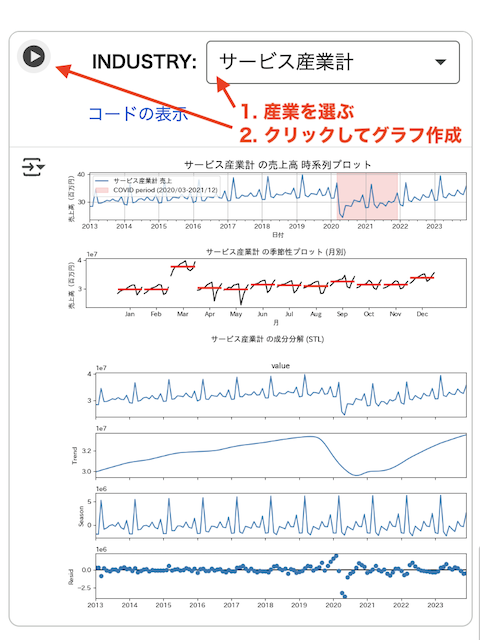

# 1. 準備

## 1.1 アプリケーションID (appId) の取得と入力


- [政府統計の総合窓口(e-Stat)−API機能 | 政府統計の総合窓口(e-Stat)−API機能](https://www.e-stat.go.jp/api/)

上のページから appId を取得して下さい。2番の `APIにより必要なjsonデータを取得` の項で必要になります。


In [ ]:
# e-Stat に登録して取得したアプリケーションID (appId) を、 APP_ID へ入力して下さい。
APP_ID = "XXXXXX"

## 1.2 インストール

1. Google Colaboratory のメニューから `▷ すべてのセルを実行` をクリックし、全て実行します。

2. `numpy` のダウングレードの箇所で、エラーで停止します。 `Restart Session` というボタンが表示されるので、セッションの再起動を行います。

3. 再び、 Google Colaboratory のメニューから `▷ すべてのセルを実行` をクリックし、全て実行します。

### `numpy` のダウングレード（要：セッションの再起動）

今回は、APIを使うための `requests` ,
数値解析やデータ整形に `numpy` , `pandas` ,
グラフの描写に `matplotlib` , 時系列分析のための `pmdarima` などを用います。

- 必要なパッケージのインストール
  - 単に `pmdarima` をインストールすると、 Google Colaboratory の `numpy` のバージョンとの整合性でエラーが生じます。

- そこで、 Google Colaboratory の `numpy` を 1.26.4 へダウングレードします。

  - [【解決】ValueError: numpy.dtype size changedエラーを徹底解説！PandasとNumPyのバージョン互換性問題](https://openillumi.com/numpy-dtype-size-changed-fix/)


- `numpy` のダウングレードには、 <B><font color = red>セッションの再起動が必要</font></B> となります。

  `pip install numpy==1.26.4` を実行後、メッセージが出て促されますので、 <B><font color = red>セッションの再起動</font></B> を行い、画面上のメニューから <B><font color = red>▷ すべてのセルを実行</font></B>  を行います。


In [ ]:
pip install numpy==1.26.4

### 時系列分析のための `pmdarima` のインストール

- 時系列分析を行うため、 `pmdarima` をインストールします。

  - 繰り返しになりますが、現在の Google Colaboratory のデフォルトでは `numpy` が 2.0 以上のため、エラーになります。

  - `numpy` を 1.26.4 にダウングレードして、セッションを再起動すると、 `pmdarima` のインストールが成功します。
  

In [ ]:
pip install pmdarima

### 日本語フォントのインストール

- グラフで日本語フォントを表示させるため、  `japanize_matplotlib` をインストールします。


In [ ]:
pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 43.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=9d12dc47f2012518e1ae8f48b239e3ee96040a23716c7a89ce57fff282736173
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize_matplotlib


## 1.3 ライブラリのインポート

- 各種ライブラリを `import` します。

In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
import pmdarima as pm
import japanize_matplotlib  # matplotlib の日本語文字化け対策
import sys
import re
import matplotlib.dates as mdates


# 2. e-Stat の API により必要な json データを取得


`requests` を使って、 API からデータを取得します （ `APP_ID` が入力されている必要があります）。

`BASE` に API の URL を設定し、 `lang` を `E` とする事で、英語名で取得します。

これを実行する事で、 `res` に生データが入ります。

`res` に入った生データを json ファイルに変換します。

In [ ]:
STATS_ID = "0003179100"
BASE = "https://api.e-stat.go.jp/rest/3.0/app/json/getStatsData"
params = {
    "appId": APP_ID,
    "statsDataId": STATS_ID,
    "lang": "E",
    "metaGetFlg": "Y",
    "cntGetFlg": "N",
    "startPosition": 1,
    "limit": 100000
}

res = requests.get(BASE, params=params, timeout=60)
js = res.json()
vals = js["GET_STATS_DATA"]["STATISTICAL_DATA"]["DATA_INF"]["VALUE"]
df = pd.json_normalize(vals)
print(df.head)


<bound method NDFrame.head of      @tab @cat01  @area       @time      @unit         $
0     001  00000  00000  2013000000  1 mil.yen  31036119
1     001  00000  00000  2014000000  1 mil.yen  31601470
2     001  00000  00000  2015000000  1 mil.yen  32544364
3     001  00000  00000  2016000000  1 mil.yen  32829582
4     001  00000  00000  2017000000  1 mil.yen  33432033
...   ...    ...    ...         ...        ...       ...
8971  001  20000  00000  2023000808  1 mil.yen   1050430
8972  001  20000  00000  2023000909  1 mil.yen   1169145
8973  001  20000  00000  2023901010  1 mil.yen   1057912
8974  001  20000  00000  2023901111  1 mil.yen   1069434
8975  001  20000  00000  2023901212  1 mil.yen   1120398

[8976 rows x 6 columns]>


## データの編集

- jsonファイルをデータフレームにしたので、class_informationテーブルから、各列の情報に対応する辞書を作る

- この辞書を使って、数字で保存されている情報を元のラベルに振り直す


In [ ]:
def to_list(x):
    if isinstance(x, list):
        return x
    else:
        return [x]

classes = js["GET_STATS_DATA"]["STATISTICAL_DATA"]["CLASS_INF"]["CLASS_OBJ"]
classes = to_list(classes)
#print(classes)
code_to_name = {}
print(df)
for c in classes:
    cid = c["@id"]
    items = to_list(c.get("CLASS"))
    code_to_name[cid] = {it["@code"]: it["@name"] for it in items}

df["industry"] = df["@cat01"].map(code_to_name["cat01"])
df["area"] = df["@area"].map(code_to_name["area"])
df["time_name"] = df["@time"].map(code_to_name["time"])
df["value"] = pd.to_numeric(df["$"])
print(df[:10])

     @tab @cat01  @area       @time      @unit         $
0     001  00000  00000  2013000000  1 mil.yen  31036119
1     001  00000  00000  2014000000  1 mil.yen  31601470
2     001  00000  00000  2015000000  1 mil.yen  32544364
3     001  00000  00000  2016000000  1 mil.yen  32829582
4     001  00000  00000  2017000000  1 mil.yen  33432033
...   ...    ...    ...         ...        ...       ...
8971  001  20000  00000  2023000808  1 mil.yen   1050430
8972  001  20000  00000  2023000909  1 mil.yen   1169145
8973  001  20000  00000  2023901010  1 mil.yen   1057912
8974  001  20000  00000  2023901111  1 mil.yen   1069434
8975  001  20000  00000  2023901212  1 mil.yen   1120398

[8976 rows x 6 columns]
  @tab @cat01  @area       @time      @unit         $ industry   area  \
0  001  00000  00000  2013000000  1 mil.yen  31036119    Total  Japan   
1  001  00000  00000  2014000000  1 mil.yen  31601470    Total  Japan   
2  001  00000  00000  2015000000  1 mil.yen  32544364    Total  Japan   

データの中身を確認します。


In [ ]:
df["time_name"].unique()

array(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023  p', 'Jan.-Mar. 2013', 'Apr.-Jun. 2013',
       'Jul.-Sep. 2013', 'Oct.-Dec. 2013', 'Jan.-Mar. 2014',
       'Apr.-Jun. 2014', 'Jul.-Sep. 2014', 'Oct.-Dec. 2014',
       'Jan.-Mar. 2015', 'Apr.-Jun. 2015', 'Jul.-Sep. 2015',
       'Oct.-Dec. 2015', 'Jan.-Mar. 2016', 'Apr.-Jun. 2016',
       'Jul.-Sep. 2016', 'Oct.-Dec. 2016', 'Jan.-Mar. 2017',
       'Apr.-Jun. 2017', 'Jul.-Sep. 2017', 'Oct.-Dec. 2017',
       'Jan.-Mar. 2018', 'Apr.-Jun. 2018', 'Jul.-Sep. 2018',
       'Oct.-Dec. 2018', 'Jan.-Mar. 2019', 'Apr.-Jun. 2019',
       'Jul.-Sep. 2019', 'Oct.-Dec. 2019', 'Jan.-Mar. 2020',
       'Apr.-Jun. 2020', 'Jul.-Sep. 2020', 'Oct.-Dec. 2020',
       'Jan.-Mar. 2021', 'Apr.-Jun. 2021', 'Jul.-Sep. 2021',
       'Oct.-Dec. 2021', 'Jan.-Mar. 2022', 'Apr.-Jun. 2022',
       'Jul.-Sep. 2022', 'Oct.-Dec. 2022', 'Jan.-Mar. 2023',
       'Apr.-Jun. 2023', 'Jul.-Sep. 2023', 'Oct.-Dec. 2023  p',
  

これを見ると、今回取ってきたデータセットでは、1年ごとのデータ、四半期ごとのデータも入っています。今回は、月別のデータを使って分析したいので、必要なデータのみ分離します。

In [ ]:
target_list = []
df["time_name"] = df["time_name"].replace("  p", "")
for word in df["time_name"].unique():
  if "-" not in word and not word.isnumeric():
    target_list.append(word)
#print(target_list)
df_monthly = df[df["time_name"].isin(target_list)]
#print(df_monthly)

month_map = {
    "Jan.": "01", "Feb.": "02", "Mar.": "03", "Apr.": "04",
    "May ": "05", "Jun.": "06", "Jul.": "07", "Aug.": "08",
    "Sep.": "09", "Oct.": "10", "Nov.": "11", "Dec.": "12"
}

def convert_month(x):
  for m,num in month_map.items():
    if m in x:
      year = re.sub(r"[A-Za-z\.\-\s]", "", x)
      return year+num

df_monthly["date"] = df_monthly["time_name"].apply(convert_month)
df_monthly["date"] = pd.to_datetime(df_monthly["date"], format="%Y%m")
df_monthly = df_monthly.dropna(subset=["date"])
df_monthly.head()

/tmp/ipython-input-2265847218.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly["date"] = df_monthly["time_name"].apply(convert_month)
/tmp/ipython-input-2265847218.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly["date"] = pd.to_datetime(df_monthly["date"], format="%Y%m")


,@tab,@cat01,@area,@time,@unit,$,industry,area,time_name,value,date
55,001,00000,00000,2013000101,1 mil.yen,28845922,Total,Japan,Jan. 2013,28845922,2013-01-01
56,001,00000,00000,2013000202,1 mil.yen,28892736,Total,Japan,Feb. 2013,28892736,2013-02-01
57,001,00000,00000,2013000303,1 mil.yen,35433719,Total,Japan,Mar. 2013,35433719,2013-03-01
58,001,00000,00000,2013000404,1 mil.yen,30163888,Total,Japan,Apr. 2013,30163888,2013-04-01
59,001,00000,00000,2013000505,1 mil.yen,30198633,Total,Japan,May 2013,30198633,2013-05-01


これで `date` 列に `datetime` 型となった日にちを入れることができました。

データ分析ができる形になったので、実際に分析をしていきます。

# 3. 関数化：他の産業についての分析

## 関数化

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # グラフ描画のために Matplotlib をインポート
import japanize_matplotlib # 日本語の文字化けを防ぐ

# 業界名のマッピング
# INDUSTRY1_list: 日本語ラベル (関数の引数、グラフのタイトルに使用)
INDUSTRY1_list = [
    "合計","サービス産業計","G情報通信業","G37通信業","G38放送業","G39情報サービス業",
    "G40インターネット附随サービス業","G41映像・音声・文字情報制作業","H運輸業，郵便業",
    "H42鉄道業","H43道路旅客運送業","H44道路貨物運送業","H45水運業","H47倉庫業",
    "H48運輸に附帯するサービス業","H4_航空運輸業，郵便業（信書便事業を含む）",
    "K不動産業，物品賃貸業","K68不動産取引業","K69不動産賃貸業・管理業","K70物品賃貸業",
    "L学術研究，専門・技術サービス業","L72専門サービス業","L73広告業","L74技術サービス業",
    "M宿泊業飲食サービス業","M75宿泊業","M76飲食店","M77持ち帰り・配達飲食サービス業",
    "N生活関連サービス業，娯楽業","N78洗濯・理容・美容・浴場業",
    "N79その他の生活関連サービス業","N80娯楽業","O教育，学習支援業",
    "O82その他の教育，学習支援業","O82aうち社会教育，職業・教育支援施設",
    "O82bうち学習塾，教養・技能教授業","P医療，福祉","P83医療業","P84保健衛生",
    "P85社会保険・社会福祉・介護事業","Rサービス業（他に分類されないもの）",
    "R88廃棄物処理業","R89自動車整備業","R90機械等修理業","R91職業紹介・労働者派遣業",
    "R92その他の事業サービス業","R95その他のサービス業","Xその他"
]

# INDUSTRY2_list: 英語/正式名称 (df_monthly['industry'] のフィルタリングに使用)
INDUSTRY2_list = [
    'Total', 'Service industry', 'G Information and communications',
    '37Communications', '38Broadcasting', '39Information services',
    '40Internet based services',
    '41Video picture, sound information, character information production and distribution',
    'H Transport and postal activities', '42Railway transport',
    '43Road passenger transport', '44Road freight transport',
    '45Water transport', '47Warehousing',
    '48Services incidental to transport',
    '4*Air transport, Postal activities, including mail delivery',
    'K Real estate and goods rental and leasing',
    '68Real estate agencies', '69Real estate lessors and managers',
    '70Goods rental and leasing',
    'L Scientific research, professional and technical services (*Excluding "scientific and development research institutes" (since January, 2013) and "pure holding companies" (since January, 2013))',
    '72Professional services, n.e.c. (*Excluding "pure holding companies" (since January, 2013))',
    '73Advertising', '74Technical services, n.e.c.',
    'M Accommodations, eating and drinking services',
    '75Accommodations', '76Eating and drinking places',
    '77Food take out and delivery services',
    'N Living-related and personal services and amusement services (*Excluding "domestic services")',
    '78Laundry, beauty and bath services',
    '79Miscellaneous living-related and personal services (*Excluding "domestic services")',
    '80Services for amusement and hobbies',
    'O Education, learning support (*Excluding "school education")',
    '82Miscellaneous education, learning support',
    '82a of which social education and vocational and educational support facilities',
    '82b of which supplementary tutorial schools and instruction service for arts, culture and technicals',
    'P Medical, health care and welfare (*Excluding "public health centers", "social insurance organizations" (since January, 2013) and "welfare offices")',
    '83Medical and other health services',
    '84Public health and hygiene (*Excluding "public health centers")',
    '85Social insurance and social welfare (*Excluding "social insurance organizations" (since January, 2013) and "welfare offices")',
    'R Services, n.e.c. (*Excluding "political, business and cultural organizations", "religion" and "foreign governments and international agencies in Japan")',
    '88Waste disposal business', '89Automobile maintenance services',
    '90Machine, etc. repair services, except otherwise classified',
    '91Employment and worker dispatching services',
    '92Miscellaneous business services', '95Miscellaneous services',
    'Others'
]

# マッピング辞書 (日本語ラベル -> 英語/正式名称)
JAPANESE_TO_ENGLISH_MAPPING = dict(zip(INDUSTRY1_list, INDUSTRY2_list))

def process_industry_timeseries(industry_name, df_monthly, plot=True):
    """
    指定された業界 (日本語ラベル) の月次データを処理し、時系列データを返し、グラフを描画する関数。

    Args:
        industry_name (str): 対象とする業界名 (日本語ラベル。例: "G40インターネット附随サービス業")
        df_monthly (pd.DataFrame): 'date', 'industry' (英語/正式名称), 'value' カラムを含むデータフレーム
                                (※'date'列はdatetime型)
        plot (bool, optional): True の場合に時系列プロットを描画。デフォルトは True。

    Returns:
        pd.Series: 'date' をインデックスとし、'value' (百万円単位) を値とする時系列データ。
                   対象データがない場合や処理に失敗した場合は None を返す。
    """

    # industry_name (日本語) をキーに、マッピングから英語/正式名称を取得
    industry_name_english = JAPANESE_TO_ENGLISH_MAPPING.get(industry_name)

    # 'date' 列の欠損値を除外し、指定された業界 (英語/正式名称) でフィルタリング
    df_filtered = df_monthly[df_monthly["industry"] == industry_name_english].dropna(subset=["date"]).copy()

    # 'date' をインデックスに設定
    ts = df_filtered.set_index('date')['value']

    # 時系列データを日付順にソート（必須）
    ts = ts.sort_index()

    # インデックスの頻度を 'MS' (月の初日) に設定
    ts.index.freq = 'MS'

    # 百万円の単位を合わせるため、100万で割る
    ts_millions = ts / 1_000_000

    # グラフ描画
    if plot:
        plt.figure(figsize=(9, 2))
        # グラフのラベルとタイトルに日本語名 (industry_name) を使用
        ts_millions.plot(label=f'{industry_name} 売上')
        plt.title(f'{industry_name} の売上高 時系列プロット', fontsize=16)
        plt.ylabel("売上高（百万円）")
        plt.xlabel("日付")
        plt.grid(True)

        # COVID-19 期間のハイライト (axvspan を使用)
        start_covid = pd.Timestamp("2020-03-01")
        end_covid = pd.Timestamp("2021-12-01")

        # データの最小値と最大値を取得し、期間がプロット範囲内にあるか確認
        if not ts_millions.empty and ts_millions.index.min() < end_covid and ts_millions.index.max() > start_covid:
             plt.axvspan(start_covid, end_covid,
                         color="red", alpha=0.15, label="COVID period (2020/03-2021/12)")

        plt.legend() # 凡例を表示 (japanize_matplotlib により日本語OK)
        plt.tight_layout() # レイアウトを調整
        plt.show()


    fig, ax = plt.subplots(figsize=(9, 2))
    sm.graphics.tsa.month_plot(ts, ax=ax)
    ax.set_title(f'{industry_name} の季節性プロット (月別)')
    ax.set_ylabel("売上高（百万円）")
    ax.set_xlabel("月")
    plt.tight_layout()

    stl = STL(ts, period=12, seasonal=13)
    decomp = stl.fit()

    # 分解結果のプロット
    fig = decomp.plot()
    fig.set_size_inches(9, 6)
    fig.suptitle(f'{industry_name} の成分分解 (STL)', y=1.02)
    plt.tight_layout()

    return


## 関数の利用例

- `サービス産業計` など、「産業」を指定すると、グラフが描画されます。

- ただ、「産業」を正確に指定するのは、面倒で大変です。

- そこで、選択肢の中からマウスで選ぶように GUI化を行うことにします。


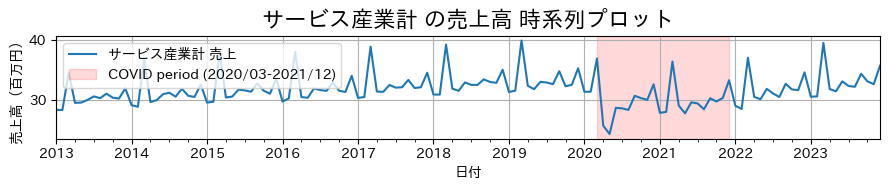

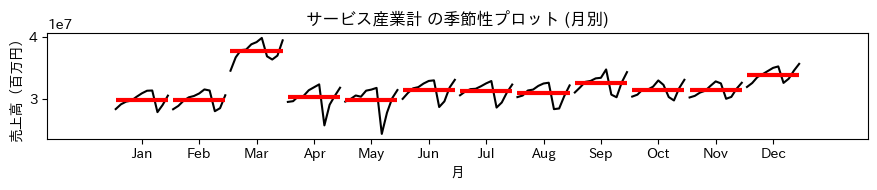

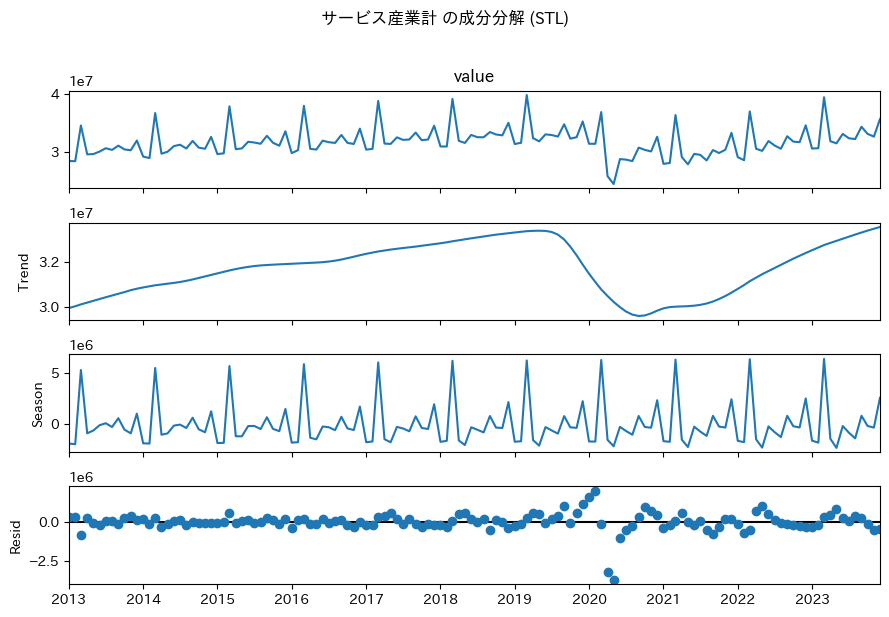

In [ ]:
process_industry_timeseries('サービス産業計', df_monthly, plot=True)


# 4. 時系列プロットの GUI 化

- 上記の 1. 〜 3. を事前に実施し、データを作成しておきます。

- 下記の `INDUSTRY` を選択し、左の `【▶】` ボタンをクリックし、実行して下さい。

- `INDUSTRY` で選択した産業（日本語ラベル）に対し、時系列プロット、季節性プロット、STL成分分解を行います。

- ARIMA モデルによる予測も含められますが、産業を変えるたびに分析を行うとなると時間がかかるため、現時点では含めていません。

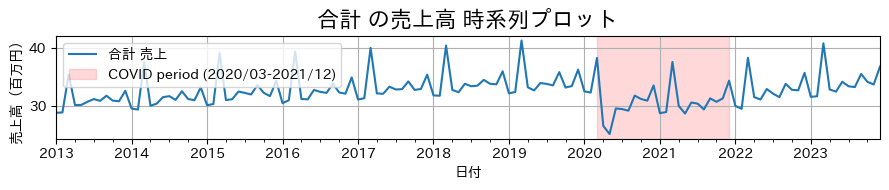

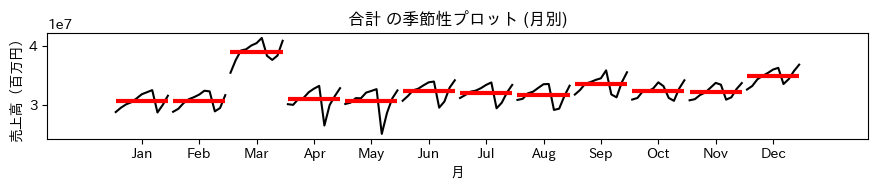

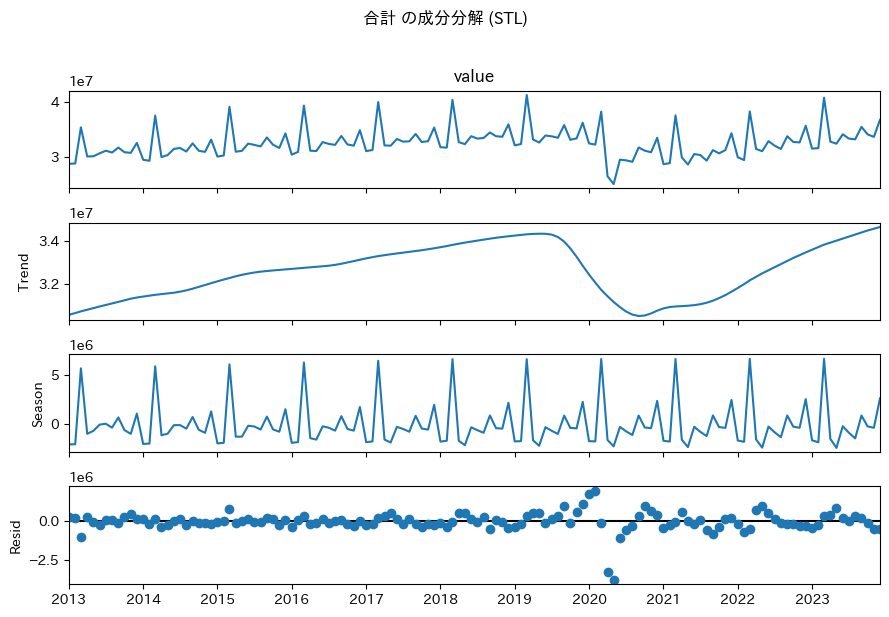

In [ ]:
# @title  {"run":"auto"}
INDUSTRY = "合計" # @param ["合計","サービス産業計","G情報通信業","G37通信業","G38放送業","G39情報サービス業", "G40インターネット附随サービス業","G41映像・音声・文字情報制作業","H運輸業，郵便業", "H42鉄道業","H43道路旅客運送業","H44道路貨物運送業","H45水運業","H47倉庫業", "H48運輸に附帯するサービス業","H4_航空運輸業，郵便業（信書便事業を含む）", "K不動産業，物品賃貸業","K68不動産取引業","K69不動産賃貸業・管理業","K70物品賃貸業", "L学術研究，専門・技術サービス業","L72専門サービス業","L73広告業","L74技術サービス業", "M宿泊業飲食サービス業","M75宿泊業","M76飲食店","M77持ち帰り・配達飲食サービス業", "N生活関連サービス業，娯楽業","N78洗濯・理容・美容・浴場業", "N79その他の生活関連サービス業","N80娯楽業","O教育，学習支援業", "O82その他の教育，学習支援業","O82aうち社会教育，職業・教育支援施設", "O82bうち学習塾，教養・技能教授業","P医療，福祉","P83医療業","P84保健衛生", "P85社会保険・社会福祉・介護事業","Rサービス業（他に分類されないもの）", "R88廃棄物処理業","R89自動車整備業","R90機械等修理業","R91職業紹介・労働者派遣業", "R92その他の事業サービス業","R95その他のサービス業","Xその他"]
process_industry_timeseries(INDUSTRY, df_monthly)

# 5. ARIMA モデルによる予測と描画の関数定義

In [ ]:
import warnings # arima で FutureWarning の警告が多く表示されるので、一時的に消す
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # グラフ描画のために Matplotlib をインポート
import japanize_matplotlib # 日本語の文字化けを防ぐ


def arima_industry(industry_name, df_monthly, plot=True):
    """
    指定された業界 (日本語ラベル) の月次データを処理し、時系列データを返し、グラフを描画する関数。

    Args:
        industry_name (str): 対象とする業界名 (日本語ラベル。例: "G40インターネット附随サービス業")
        df_monthly (pd.DataFrame): 'date', 'industry' (英語/正式名称), 'value' カラムを含むデータフレーム
                                (※'date'列はdatetime型)
        plot (bool, optional): True の場合に時系列プロットを描画。デフォルトは True。

    Returns:
        pd.Series: 'date' をインデックスとし、'value' (百万円単位) を値とする時系列データ。
                   対象データがない場合や処理に失敗した場合は None を返す。
    """

    # industry_name (日本語) をキーに、マッピングから英語/正式名称を取得
    industry_name_english = JAPANESE_TO_ENGLISH_MAPPING.get(industry_name)

    # 'date' 列の欠損値を除外し、指定された業界 (英語/正式名称) でフィルタリング
    df_filtered = df_monthly[df_monthly["industry"] == industry_name_english].dropna(subset=["date"]).copy()

    # 'date' をインデックスに設定
    ts = df_filtered.set_index('date')['value']

    # 時系列データを日付順にソート（必須）
    ts = ts.sort_index()

    # インデックスの頻度を 'MS' (月の初日) に設定
    # asfreq('MS') を使うと、データが飛んでいても 'MS' 頻度を強制できる
    # ここでは元のコードの意図を汲み、freq属性のみを設定しようと試みる
    ts.index.freq = 'MS'

    # 百万円の単位を合わせるため、100万で割る
    ts_millions = ts / 1_000_000



    fit_arima = pm.auto_arima(
        ts,
        D=1,              # 季節階差
        seasonal=True,    # 季節性を考慮
        m=12,             # 季節周期 (月次)
        stepwise=False,   # フルサーチ
        suppress_warnings=True, # 警告を非表示
        trace=False        # 試行したモデルを表示
    )

    n_periods = 24
    preds, conf_int = fit_arima.predict(
        n_periods=n_periods,
        return_conf_int=True,
        alpha=0.05  # 95%信頼区間
    )

    index_of_fc = pd.date_range(
        ts.index[-1] + pd.offsets.MonthBegin(1),
        periods=n_periods,
        freq='MS'
    )

    fc_series = pd.Series(preds, index=index_of_fc)
    lower_series = pd.Series(conf_int[:, 0], index=index_of_fc)
    upper_series = pd.Series(conf_int[:, 1], index=index_of_fc)


    #  グラフ描画
    plt.figure(figsize=(10, 6))
    plt.plot(ts, label='観測値')
    plt.plot(fc_series, label='予測値', color='darkgreen')
    plt.fill_between(
        lower_series.index,
        lower_series,
        upper_series,
        color='k',
        alpha=0.15,
        label='95%信頼区間'
    )
    plt.title(f'飲食店の売上高予測 (ARIMA)')
    plt.ylabel("売上高（百万円）")
    plt.xlabel("日付")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()

    return


# 6. ARIMA による予測 GUI

- <B><font color = red>実行のたびに、グラフの描画に 5分〜20分ほどかかります。</font></B>

- 下記の `INDUSTRY` を選択し、左の `【▶】` ボタンをクリックし、実行して下さい。


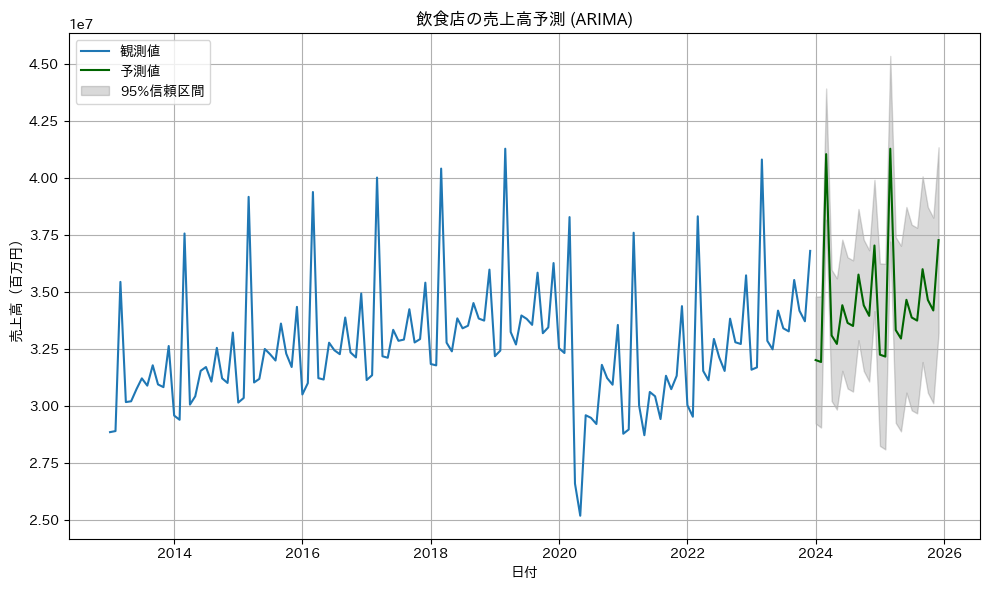

In [ ]:
# @title  {"run":"auto"}
INDUSTRY = "合計" # @param ["合計","サービス産業計","G情報通信業","G37通信業","G38放送業","G39情報サービス業", "G40インターネット附随サービス業","G41映像・音声・文字情報制作業","H運輸業，郵便業", "H42鉄道業","H43道路旅客運送業","H44道路貨物運送業","H45水運業","H47倉庫業", "H48運輸に附帯するサービス業","H4_航空運輸業，郵便業（信書便事業を含む）", "K不動産業，物品賃貸業","K68不動産取引業","K69不動産賃貸業・管理業","K70物品賃貸業", "L学術研究，専門・技術サービス業","L72専門サービス業","L73広告業","L74技術サービス業", "M宿泊業飲食サービス業","M75宿泊業","M76飲食店","M77持ち帰り・配達飲食サービス業", "N生活関連サービス業，娯楽業","N78洗濯・理容・美容・浴場業", "N79その他の生活関連サービス業","N80娯楽業","O教育，学習支援業", "O82その他の教育，学習支援業","O82aうち社会教育，職業・教育支援施設", "O82bうち学習塾，教養・技能教授業","P医療，福祉","P83医療業","P84保健衛生", "P85社会保険・社会福祉・介護事業","Rサービス業（他に分類されないもの）", "R88廃棄物処理業","R89自動車整備業","R90機械等修理業","R91職業紹介・労働者派遣業", "R92その他の事業サービス業","R95その他のサービス業","Xその他"]
arima_industry(INDUSTRY, df_monthly)